In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 693s 4us/step


In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [6]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7824 - accuracy: 0.7267 - val_loss: 0.9069 - val_accuracy: 0.6879
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7590 - accuracy: 0.7345 - val_loss: 0.9328 - val_accuracy: 0.6849
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7349 - accuracy: 0.7409 - val_loss: 0.8901 - val_accuracy: 0.6918
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7169 - accuracy: 0.7496 - val_loss: 0.8714 - val_accuracy: 0.6988
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6921 - accuracy: 0.7575 - val_loss: 0.9160 - val_accuracy: 0.6917
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6718 - accuracy: 0.7652 - val_loss: 0.8974 - val_accuracy: 0.7020
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6531 - accuracy: 0.7710 - val_loss: 0.8705 -

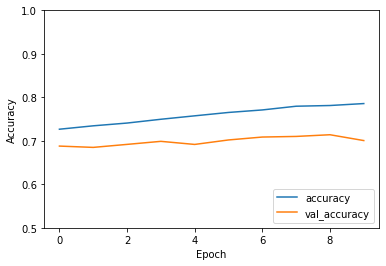

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')